# Проект промышленность

## Цель проекта

Разработать модель, которая предсказывает температуру стали, для экономии электроэнергии на этапе обработки стали на производстве

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали.

## Примерный план решения задачи.

- Составить план работ - расписать алгоритм решения задачи 
- Провести исследовательский анализ данных - разобраться в вводных данных, сделать выводы по ним 
- Провести предобработку данных
- Выбрать оптимальную модель обучения - на основе анализа данных понять какую задачу предстоит решить модели, выбрать метрику качества, подобрать гиперпараметры
- Протестировать модель
- Составить отчет о проделанной работе

## Предобработка данных

In [1]:
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt 

import numpy as np 

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
pth1 = '/datasets/'
pth2 = '/Users/aleksandrfilippov/practicum/practicum_env/1datasets/'
pth3 = '/content/drive/MyDrive/'

if os.path.exists(pth1):
    df_arc = pd.read_csv(pth1 +'data_arc_new.csv')
    df_bulk = pd.read_csv(pth1 +'data_bulk_new.csv')
    df_bulk_time = pd.read_csv(pth1 +'data_bulk_time_new.csv')
    df_gas = pd.read_csv(pth1 +'data_gas_new.csv')
    df_temp = pd.read_csv(pth1 +'data_temp_new.csv')
    df_wire = pd.read_csv(pth1 +'data_wire_new.csv')
    df_wire_time = pd.read_csv(pth1 +'data_wire_time_new.csv')
elif os.path.exists(pth2):
    df_arc = pd.read_csv(pth2 +'data_arc_new.csv')
    df_bulk = pd.read_csv(pth2 +'data_bulk_new.csv')
    df_bulk_time = pd.read_csv(pth2 +'data_bulk_time_new.csv')
    df_gas = pd.read_csv(pth2 +'data_gas_new.csv')
    df_temp = pd.read_csv(pth2 +'data_temp_new.csv')
    df_wire = pd.read_csv(pth2 +'data_wire_new.csv')
    df_wire_time = pd.read_csv(pth2 +'data_wire_time_new.csv')
elif os.path.exists(pth3):
    df_arc = pd.read_csv(pth3 +'data_arc_new.csv')
    df_bulk = pd.read_csv(pth3 +'data_bulk_new.csv')
    df_bulk_time = pd.read_csv(pth3 +'data_bulk_time_new.csv')
    df_gas = pd.read_csv(pth3 +'data_gas_new.csv')
    df_temp = pd.read_csv(pth3 +'data_temp_new.csv')
    df_wire = pd.read_csv(pth3 +'data_wire_new.csv')
    df_wire_time = pd.read_csv(pth3 +'data_wire_time_new.csv')
else:
    print('Something is wrong')

In [3]:
# Функция, принимающая датафрейм и возвращающая основную информацию
def analyze_it(df, df_name):
    print(df_name)
    display(df.head(10))
    print('---------------------------')
    display(df.info())
    print('---------------------------')
    display(df.drop('key', axis=1).describe())
    print('---------------------------')
    print('Наличие дубликатов:', df.duplicated().value_counts())

#Функция визуализации
def visualize_it(df, xlim1, xlim2, figsize):
    plt.figure(figsize=figsize)
    df.drop('key', axis=1).boxplot(vert=False)
    plt.xlim(xlim1, xlim2)
    plt.show()

### Данные об электродах

In [4]:
analyze_it(df_arc, 'Данные об электродах')

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

---------------------------


,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000
mean,0.662752,0.438986
std,0.258885,5.873485
min,0.223120,-715.479924
25%,0.467115,0.337175
50%,0.599587,0.441639
75%,0.830070,0.608201
max,1.463773,1.270284


---------------------------
Наличие дубликатов: False    14876
dtype: int64


Имеется явный выброс реактивной мощности, поэтому рассмотрим график без него(без удаления)

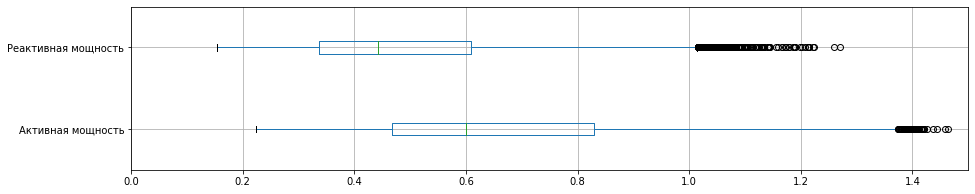

In [5]:
visualize_it(df_arc, 0, 1.5, (15,3))

Вывод:

Имеется график с временем процесса(начальным и конечным), а так же активная и реактивная мощности

Присутствуют явные выбросы, дубликатов нет, пропусков нет

### Данные о подаче сыпучих материалов

In [6]:
analyze_it(df_bulk, 'Данные о подаче сыпучих материалов(объем)')

Данные о подаче сыпучих материалов(объем)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

---------------------------


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


---------------------------
Наличие дубликатов: False    3129
dtype: int64


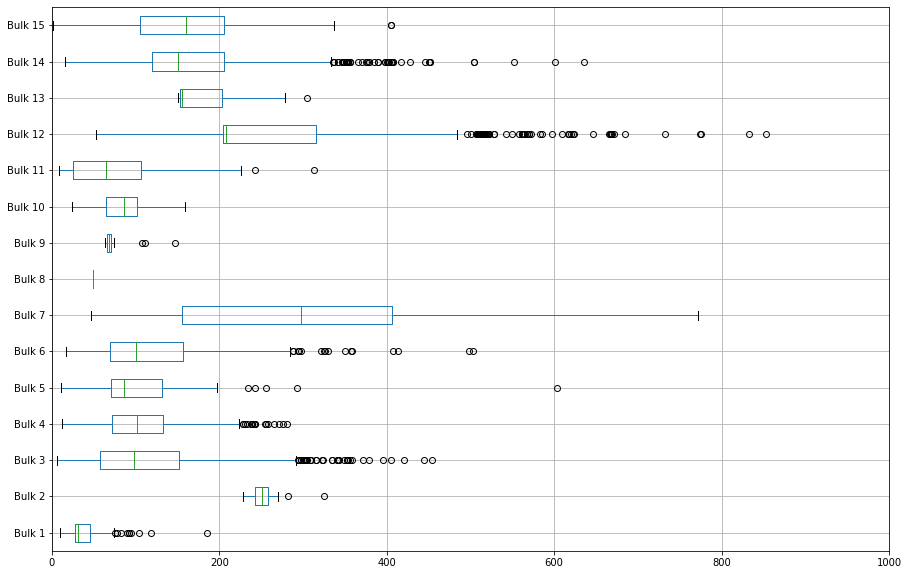

In [7]:
visualize_it(df_bulk, 0, 1000, (15,10))

In [8]:
analyze_it(df_bulk_time, 'Данные о подаче сыпучих материалов(время)')

Данные о подаче сыпучих материалов(время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

---------------------------


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
unique,252,22,1298,1014,77,576,25,1,19,176,177,2450,18,2806,2248
top,2019-08-14 16:26:27,2019-08-13 11:47:39,2019-05-09 23:06:29,2019-07-23 03:03:31,2019-07-25 16:58:47,2019-06-06 03:09:43,2019-08-12 20:24:56,2019-07-08 17:14:53,2019-05-14 16:00:13,2019-05-21 05:56:02,2019-05-25 06:37:43,2019-08-31 23:51:38,2019-08-26 07:00:42,2019-08-16 10:04:39,2019-09-02 01:23:00
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


---------------------------
Наличие дубликатов: False    3129
dtype: int64


Вывод:

Перед нами два датафрейма, характеризующие процесс подачи сыпучих материалов(объем и время)

В данных явных выбросов не обнаружено, однако пропусков достаточно много(кроме 8 итерации), предположительно это связано с тем, что сыпучие материалы не поступали в этот момент(можно заменить на 0)

### Данные о продувке сплава газом

In [9]:
analyze_it(df_gas, 'Данные о продувке сплава газом')

Данные о продувке сплава газом


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

---------------------------


,Газ 1
count,3239.000000
mean,11.002062
std,6.220327
min,0.008399
25%,7.043089
50%,9.836267
75%,13.769915
max,77.995040


---------------------------
Наличие дубликатов: False    3239
dtype: int64


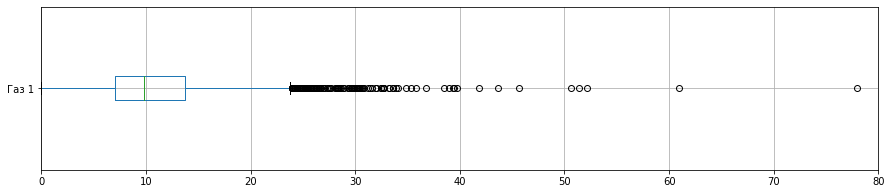

In [10]:
visualize_it(df_gas, 0, 80, (15,3))

Вывод:

Перед нами датафрейм, продувки сплава газом

В данных явных выбросов не обнаружено, пропуски отсутствуют

### Результаты измерения температуры

In [11]:
analyze_it(df_temp, 'Результаты измерения температуры')

Результаты измерения температуры


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None

---------------------------


,Температура
count,14665.000000
mean,1590.722741
std,20.394381
min,1191.000000
25%,1580.000000
50%,1590.000000
75%,1599.000000
max,1705.000000


---------------------------
Наличие дубликатов: False    18092
dtype: int64


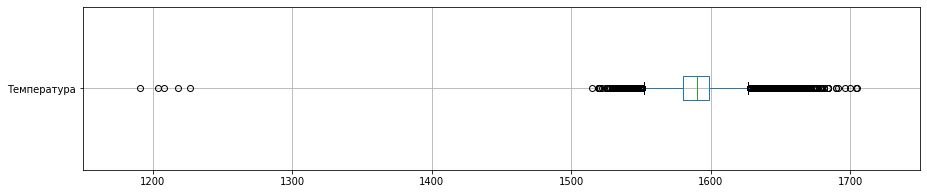

In [12]:
visualize_it(df_temp, 1150, 1750, (15,3))

Вывод:

Данный датафрейм представляет собой температуру сплава в процессе обработки.

Данные являются целевыми, поэтому стоит внимательнее заниматься их предобработкой

Обнаружены пропуски и выбросы в районе(1190-1250 градусов Цельсия)

### Данные о проволочных материалах 

In [13]:
analyze_it(df_wire, 'Данные о проволочных материалах(объем)')

Данные о проволочных материалах(объем)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

---------------------------


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


---------------------------
Наличие дубликатов: False    3081
dtype: int64


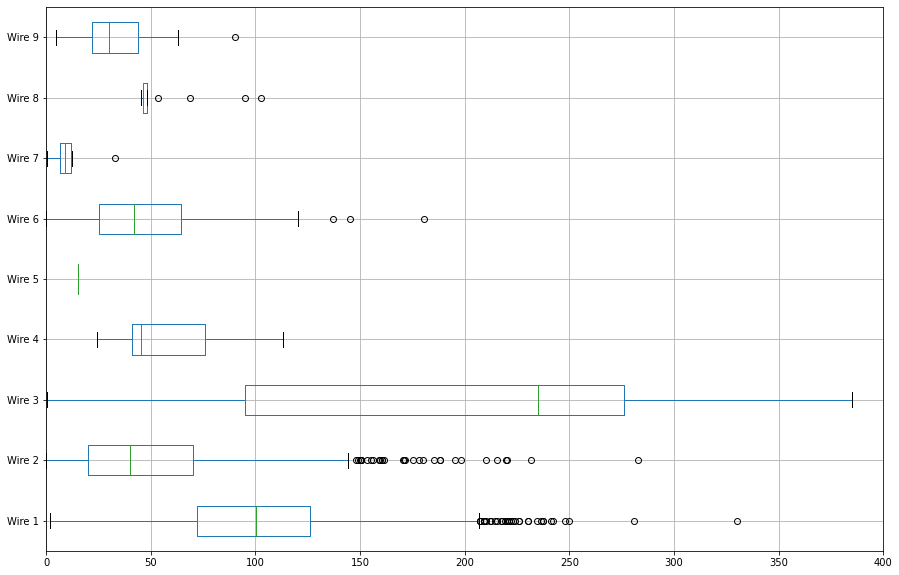

In [14]:
visualize_it(df_wire, 0, 400, (15,10))

In [15]:
analyze_it(df_wire_time, 'Данные о проволочных материалах(время)')

Данные о проволочных материалах(время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

---------------------------


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3055,1079,63,14,1,73,11,19,29
unique,3055,1079,63,14,1,73,11,19,29
top,2019-07-20 04:13:47,2019-05-18 23:36:29,2019-06-14 21:33:28,2019-08-12 19:51:09,2019-08-13 06:14:30,2019-07-27 03:11:17,2019-08-13 01:13:45,2019-08-16 04:37:28,2019-06-09 21:38:20
freq,1,1,1,1,1,1,1,1,1


---------------------------
Наличие дубликатов: False    3081
dtype: int64


Вывод:

Перед нами два датафрейма, которые отображают объем и время добавления проволочных материалов

Явных выбросов не обнаружено, пропуски аналогично с сыпучими материалами обнаружены

### Вывод по главе

- Были выгружены и проанализированны данные о процессе обработки стали 
- В ходе данной главы были выделены следующие характеристики данных:

    - В данных присутствует информация о всех этапах обработки стали
    - Некоторые данные имеют явные выбросы, большинство имеют аномальные значения
    - Присутствуют пропуски (особенно много в сыпучих и проволочных материалах, а так же в целевом признаке)
    - Дубликатов не обнаружено 

Для этапа предобработки данных у заказчика необходимо уточнить следующую информацию:

- Какие значения можно считать выбросами и пренебречь ими в дальнейшей работе? (например нормально ли, что температура сплава падает ниже температуры плавления стали?)
- Можно ли объеденить значения по добавочным материалам, которых очень мало используется?(так же возможные варианты это удаление таких данных)

## Предобработка данных

Первым делом избавимся от выбросов, заполним пропуски где это допустимо, преобразуем признаки, удалим оставшиеся пропуски

In [16]:
#Удалим выброс перед вычислениями
df_arc = df_arc[df_arc['Реактивная мощность']>=0]
#Преобразуем время в формат datetime
df_arc['Конец нагрева дугой'] = pd.to_datetime(df_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
df_arc['Начало нагрева дугой'] = pd.to_datetime(df_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

#Вычислим полную мощность
df_arc['Полная мощность'] = (df_arc['Активная мощность'] ** 2 
                             + 
                             df_arc['Реактивная мощность'] ** 2
                            ) ** (0.5)

#Вычислим время нагрева и преобразуем в вид секунд(типа int)
df_arc['Время нагрева'] = (
                            df_arc['Конец нагрева дугой'] 
                            - 
                            df_arc['Начало нагрева дугой']
)

df_arc['Время нагрева'] = df_arc['Время нагрева'].apply(pd.Timedelta.total_seconds).astype('int')


df_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148
...,...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,0.532085,157
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,0.792429,180
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,1.293389,184
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,0.641792,57


In [17]:
# Сгруппируем данные по ключу
df_arc_gb = df_arc.groupby('key').sum()[['Время нагрева', 'Полная мощность']].reset_index()
df_arc_gb

,key,Время нагрева,Полная мощность
0,1,1098,3.718736
1,2,811,2.588349
2,3,655,5.019223
3,4,741,3.400038
4,5,869,2.816980
...,...,...,...
3209,3237,909,3.250657
3210,3238,546,1.723937
3211,3239,1216,6.014480
3212,3240,839,4.082920


In [18]:
# Заполним пропуски аномальным значением, сгруппируем по времени последнего замера и удалим аномальные данные
agg_dict = {
    'Время замера': ['first', 'last'],
    'Температура': ['first', 'last']
}

df_temp = df_temp.fillna(-1)
df_temp['Время замера'] = pd.to_datetime(df_temp['Время замера'])
df_temp_gb = df_temp.groupby('key').agg(agg_dict).reset_index()
df_temp_gb.columns = ['key', 'first_time', 'last_time', 'first_temp', 'last_temp']
df_temp_gb = df_temp_gb[(df_temp_gb['first_temp'] >= 1400) & (df_temp_gb['last_temp'] >= 1400)].drop(['first_time','last_time'], axis=1)

In [19]:
df_temp_gb

,key,first_temp,last_temp
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2472,2495,1570.0,1591.0
2473,2496,1554.0,1591.0
2474,2497,1571.0,1589.0
2475,2498,1591.0,1594.0


In [20]:
#Для таблиц Bulk и Wire принято решение проссумировать маловстречающиеся типы материалов в others
df_wire = df_wire.fillna(0)
df_wire['Wire_sum'] = df_wire.iloc[:, 3:].sum(axis=1)
df_wire.drop(df_wire.columns[3:-1], axis=1, inplace=True)
df_wire

,key,Wire 1,Wire 2,Wire_sum
0,1,60.059998,0.00000,0.0
1,2,96.052315,0.00000,0.0
2,3,91.160157,0.00000,0.0
3,4,89.063515,0.00000,0.0
4,5,89.238236,9.11456,0.0
...,...,...,...,...
3076,3237,38.088959,0.00000,0.0
3077,3238,56.128799,0.00000,0.0
3078,3239,143.357761,0.00000,0.0
3079,3240,34.070400,0.00000,0.0


In [21]:
columns_to_combine = ['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13']
df_bulk = df_bulk.fillna(0)
df_bulk['Bulk_sum'] = df_bulk[columns_to_combine].sum(axis=1)
df_bulk.drop(columns=columns_to_combine, inplace=True)
df_bulk

,key,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,Bulk_sum
0,1,0.0,43.0,0.0,206.0,150.0,154.0,0.0
1,2,0.0,73.0,0.0,206.0,149.0,154.0,0.0
2,3,0.0,34.0,0.0,205.0,152.0,153.0,0.0
3,4,0.0,81.0,0.0,207.0,153.0,154.0,0.0
4,5,0.0,78.0,0.0,203.0,151.0,152.0,0.0
...,...,...,...,...,...,...,...,...
3124,3237,170.0,0.0,0.0,252.0,130.0,206.0,0.0
3125,3238,126.0,0.0,0.0,254.0,108.0,106.0,0.0
3126,3239,0.0,0.0,114.0,158.0,270.0,88.0,0.0
3127,3240,0.0,0.0,26.0,0.0,192.0,54.0,0.0


In [22]:
# Соединим все таблицы и удалим пропуски
df = (df_arc_gb
      .merge(df_temp_gb, on='key', how='left')
      .merge(df_wire, on='key', how='left')
      .merge(df_bulk, on='key', how='left')
      .merge(df_gas, on='key', how='left')
      .dropna()
      .drop(['key'], axis=1)
      .reset_index(drop=True)
     )

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Время нагрева    2325 non-null   int64  
 1   Полная мощность  2325 non-null   float64
 2   first_temp       2325 non-null   float64
 3   last_temp        2325 non-null   float64
 4   Wire 1           2325 non-null   float64
 5   Wire 2           2325 non-null   float64
 6   Wire_sum         2325 non-null   float64
 7   Bulk 3           2325 non-null   float64
 8   Bulk 4           2325 non-null   float64
 9   Bulk 6           2325 non-null   float64
 10  Bulk 12          2325 non-null   float64
 11  Bulk 14          2325 non-null   float64
 12  Bulk 15          2325 non-null   float64
 13  Bulk_sum         2325 non-null   float64
 14  Газ 1            2325 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 272.6 KB


,Время нагрева,Полная мощность,first_temp,last_temp,Wire 1,Wire 2,Wire_sum,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14,Bulk 15,Bulk_sum,Газ 1
0,1098,3.718736,1571.0,1613.0,60.059998,0.00000,0.0,0.0,43.0,0.0,206.0,150.0,154.0,0.0,29.749986
1,811,2.588349,1581.0,1602.0,96.052315,0.00000,0.0,0.0,73.0,0.0,206.0,149.0,154.0,0.0,12.555561
2,655,5.019223,1596.0,1599.0,91.160157,0.00000,0.0,0.0,34.0,0.0,205.0,152.0,153.0,0.0,28.554793
3,741,3.400038,1601.0,1625.0,89.063515,0.00000,0.0,0.0,81.0,0.0,207.0,153.0,154.0,0.0,18.841219
4,869,2.816980,1576.0,1602.0,89.238236,9.11456,0.0,0.0,78.0,0.0,203.0,151.0,152.0,0.0,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,723,3.868721,1570.0,1591.0,89.150879,0.00000,0.0,21.0,0.0,0.0,256.0,129.0,223.0,90.0,7.125735
2321,940,5.070316,1554.0,1591.0,114.179527,0.00000,0.0,0.0,63.0,0.0,256.0,129.0,226.0,122.0,9.412616
2322,569,4.360918,1571.0,1589.0,94.086723,9.04800,0.0,0.0,85.0,0.0,230.0,124.0,226.0,0.0,6.271699
2323,750,3.909917,1591.0,1594.0,118.110717,0.00000,0.0,90.0,0.0,0.0,206.0,129.0,207.0,101.0,14.953657


Так же рассмотрим итоговое значение корреляции

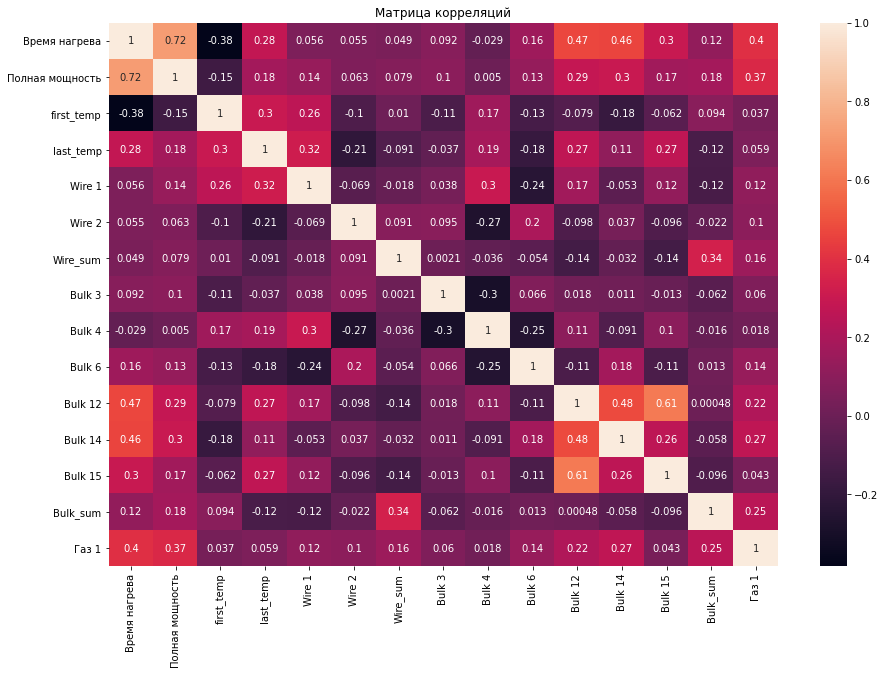

In [23]:
import seaborn as sns 
plt.figure(figsize=(15, 10))
plt.title('Матрица корреляций')

sns.heatmap(df.corr(), annot = True)

plt.show()

Очень сильной корреляции не прослеживается, все значения в пределах допустимого (до 0.8)

## Обучение моделей 

Для этой главы будут использоваться следующие модели:

- Линейная регрессия
- Дерево решений
- Случайный лес
- LGBRegressor

### Подготовка к обучению 

In [24]:
!pip install optuna

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import lightgbm as lgb

import optuna
from optuna.integration import OptunaSearchCV
optuna.logging.set_verbosity(optuna.logging.WARNING)

RANDOM_STATE = 10923
CV=3

In [26]:
features = df.drop(['last_temp'], axis=1)
target = df['last_temp']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1743, 14) (1743,)
(582, 14) (582,)


### Линейная регрессия

In [27]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
scoring_metrics = make_scorer(mean_absolute_error, 
                              greater_is_better=False
                             )

score = cross_val_score(model_lin,
                        x_train,
                        y_train, 
                        cv=CV, 
                        scoring=scoring_metrics)
mse = -score.mean()

print('MAE линейной регрессии: ', mse)

MAE линейной регрессии:  6.298964043381576


### Случайное дерево

In [28]:
params = {
        'max_depth': optuna.distributions.IntDistribution(2, 16),
        'min_samples_split': optuna.distributions.FloatDistribution(0.1, 1.0),
        'min_samples_leaf': optuna.distributions.FloatDistribution(0.1, 0.5),
    }

optuna_dt = OptunaSearchCV(DecisionTreeRegressor(), 
                           param_distributions=params, 
                           n_trials=100, 
                           n_jobs=-1, 
                           scoring='neg_mean_absolute_error', 
                           random_state=RANDOM_STATE,
                           cv=CV)
optuna_dt.fit(x_train,y_train)

print('Лучшие параметры: ', optuna_dt.best_params_)
print('МАЕ случайного дерева: ', -optuna_dt.best_score_)

Лучшие параметры:  {'max_depth': 16, 'min_samples_split': 0.10560298477069155, 'min_samples_leaf': 0.10266776019648521}
МАЕ случайного дерева:  7.589254249332879


### Лес деревьев 

In [29]:
params = {
        'max_depth': optuna.distributions.IntDistribution(2, 16),
        'min_samples_split': optuna.distributions.FloatDistribution(0.1, 1.0),
        'min_samples_leaf': optuna.distributions.FloatDistribution(0.1, 0.5),
    }

optuna_rf = OptunaSearchCV(RandomForestRegressor(),
                           param_distributions=params, 
                           n_trials=100, n_jobs=-1, 
                           scoring='neg_mean_absolute_error', 
                           random_state=RANDOM_STATE,
                           cv=CV)
optuna_rf.fit(x_train,y_train)

print('Лучшие параметры: ', optuna_rf.best_params_)
print('МАЕ случайного дерева: ', -optuna_rf.best_score_)

Лучшие параметры:  {'max_depth': 6, 'min_samples_split': 0.1704641130785812, 'min_samples_leaf': 0.10155055542192001}
МАЕ случайного дерева:  7.128679358643702


### LGBRegressor 

In [30]:
params = {
        'boosting_type': optuna.distributions.CategoricalDistribution(['gbdt', 'dart']),
        'num_leaves': optuna.distributions.IntDistribution(2, 100),
        'learning_rate': optuna.distributions.FloatDistribution(0.001, 0.5)   
}

optuna_lgb = OptunaSearchCV(lgb.LGBMRegressor(objective='regression', metric ='l1', verbosity=-1), 
                           param_distributions=params, 
                           n_trials=100, 
                           n_jobs=-1, 
                           scoring='neg_mean_absolute_error', 
                           random_state=RANDOM_STATE,
                           cv=CV)

optuna_lgb.fit(x_train, y_train)

print('Лучшие параметры: ', optuna_lgb.best_params_)
print('МАЕ градиентного бустинга: ', -optuna_lgb.best_score_)

Лучшие параметры:  {'boosting_type': 'gbdt', 'num_leaves': 5, 'learning_rate': 0.10916230472618013}
МАЕ градиентного бустинга:  6.191502391899049


### Вывод 

Лучшим образом себя показала модель LGBMRegressor  
Проверим значение на тестовой выборке

### Тестирование лучшей модели

In [31]:
predict = optuna_lgb.predict(x_test)
print('MAE на тестовой выборке: ',mean_absolute_error(predict, y_test))

MAE на тестовой выборке:  6.51098465002929


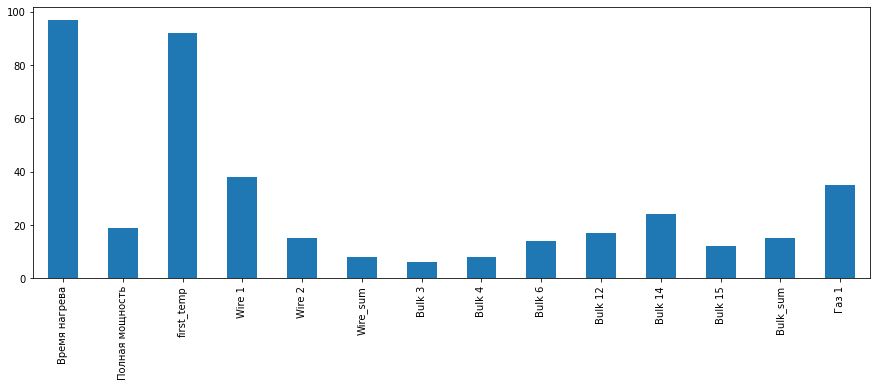

In [32]:
features = pd.Series(optuna_lgb.best_estimator_.feature_importances_, index=x_train.columns)

plt.figure(figsize=(15,5))
features.plot.bar()
plt.show()

Дело за малым, осталось составить отчет

## Отчет о проделанной работе

1) Какие пункты плана были выполнены, а какие - нет:

   - Все поставленные пункты были выполнены

2) Какие трудности возникли и как они были преодалены:

   - Основной трудностью проекта было малое количество данных, с которыми приходилось работать. Основным принятым решением было оставить наибольшее число данных

   - Создание новых данных на основе имеющихся приводили к проблеме мультиколлинеарности, поэтому в работе были использованы только преобразованные старые данные
  
3) Какие ключевые шаги в решениях задачи были выделены:

   - Ключевыми шагами были предобработка данных, объединение данных, преобразование данных, анализ обучения моделей
     


4) Итоговая модель и ее качество:

   Итоговой моделью была выбрана модель LGBMRegressor с гиперпараметрами **boosting type** = gbdt, **num leaves** = 5, **learning_rate** = 0.11, **random state** = 10923 и **cv** =  3

   Данная модель показала лучшее значение на тренировочной выборке методом кросс валидации (MAE=6.2) и на тестовой выборке прошла целевой порог в MAE<=6.8, показав итоговую метрику MAE=6.51

   Признаки, которые использовались для данной модели были преобразованные данные, такие как:

   - Температура первого и последнего замера (если такие данные имелись)
   - Количество сыпучих и проволочных материалов (для редкодобавляемых было принято решение их объединить для упрощения работы модели)
   - Полная мощность (получена путем вычислений из реактивной и активной мощностей)
   - Подача газа

    Для улучшения работы модели можно предложить следующие шаги:

   - Добавление бОльшего количества данных (вернуться к исследованию при новом количестве данных, например в два раза)
   - Добавление новых признаков (например добавить факторы которые напрямую в процессе не участвуют, однако косвенно могут влиять на изменение данных)
   - Протестировать влияние временных показателей для выявления трендов, влияющих на работу ковша (поиск первопричины)